In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from datetime import date

# IMPORTING DATA SET

In [2]:
data_crime = pd.read_csv("D:\DATA_ANALYST\data_crime\crime.csv")

In [3]:
data_crime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [4]:
#Jumlah Record
data_crime.shape

(530652, 12)

# EDA

## Check Missing value

In [5]:
data_crime.isna().sum()

TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR             54362
MINUTE           54362
HUNDRED_BLOCK       13
NEIGHBOURHOOD    56624
X                    0
Y                    0
Latitude             0
Longitude            0
dtype: int64

## Drop Cloumn

In [6]:
data_crimed = data_crime.drop(columns=['HOUR', 'MINUTE','HUNDRED_BLOCK','X','Y','Latitude','Longitude'])
data_crimedd = data_crimed.dropna()
data_crime1 = data_crimedd.reset_index(drop=True)
data_crime1

,TYPE,YEAR,MONTH,DAY,NEIGHBOURHOOD
0,Other Theft,2003,5,12,Strathcona
1,Other Theft,2003,5,7,Strathcona
2,Other Theft,2003,4,23,Strathcona
3,Other Theft,2003,4,20,Strathcona
4,Other Theft,2003,4,12,Strathcona
...,...,...,...,...,...
474023,Mischief,2017,1,18,Grandview-Woodland
474024,Break and Enter Residential/Other,2017,3,3,Hastings-Sunrise
474025,Mischief,2017,5,29,Grandview-Woodland
474026,Theft from Vehicle,2017,6,5,Central Business District


## Combine Date Column 

In [7]:
data_crime1['DATE'] = pd.to_datetime(data_crime1[['DAY', 'MONTH','YEAR']])
data_crime2 = data_crime1.drop(columns=['DAY', 'MONTH','YEAR'])
data_crime2.head(10)

,TYPE,NEIGHBOURHOOD,DATE
0,Other Theft,Strathcona,2003-05-12
1,Other Theft,Strathcona,2003-05-07
2,Other Theft,Strathcona,2003-04-23
3,Other Theft,Strathcona,2003-04-20
4,Other Theft,Strathcona,2003-04-12
5,Other Theft,Strathcona,2003-03-26
6,Break and Enter Residential/Other,Kerrisdale,2003-03-10
7,Mischief,Dunbar-Southlands,2003-06-28
8,Other Theft,Strathcona,2003-02-16
9,Break and Enter Residential/Other,Grandview-Woodland,2003-07-09


In [8]:
data_crime2.isna().sum()

TYPE             0
NEIGHBOURHOOD    0
DATE             0
dtype: int64

In [9]:
data_crime2['TYPE'].nunique()

9

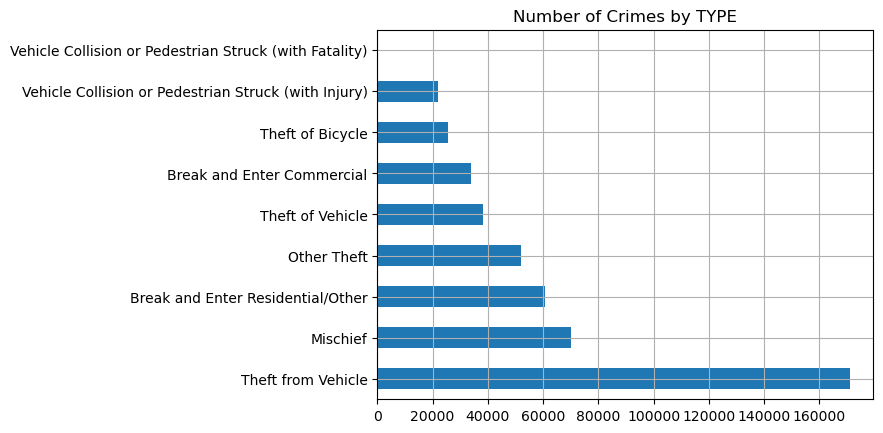

In [48]:
counts = data_crime2['TYPE'].str.split(r',\s+', expand=True).stack().value_counts()
colors = ['grey', 'grey', 'grey', 'grey', 'red', 'grey']
counts.plot.barh( grid=True,)
plt.title("Number of Crimes by TYPE")
plt.show()

Text(0.5, 1.0, 'Number of Crime by Year')

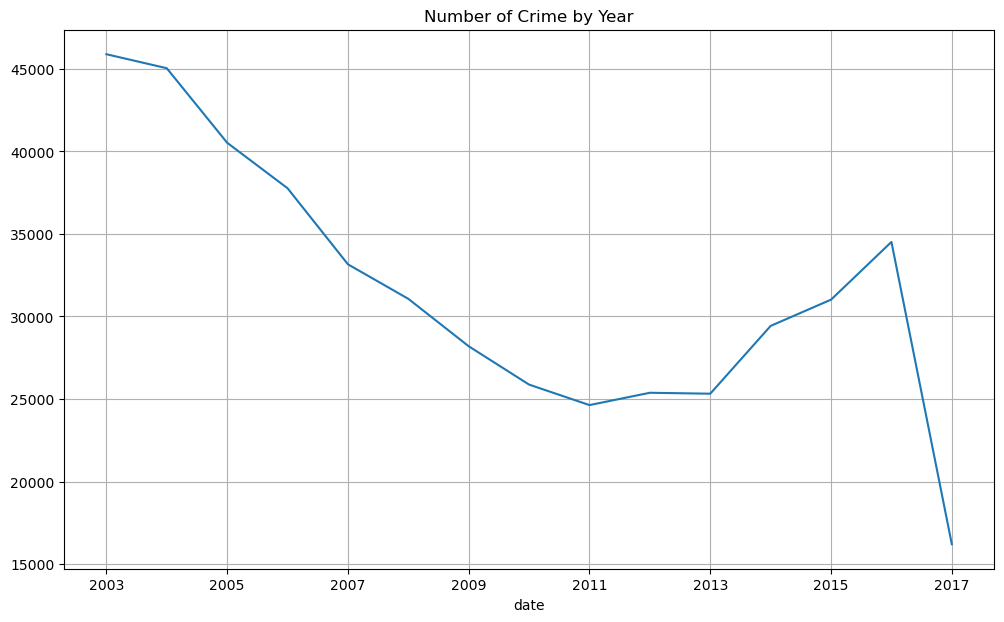

In [45]:
ax = data_crime2.groupby(pd.to_datetime(data_crime2['DATE']).dt.strftime('%Y'), sort=False)['DATE'].size().plot(grid=True,figsize=(12,7))
ax.set_xlabel('date')
ax.set_title('Number of Crime by Year')

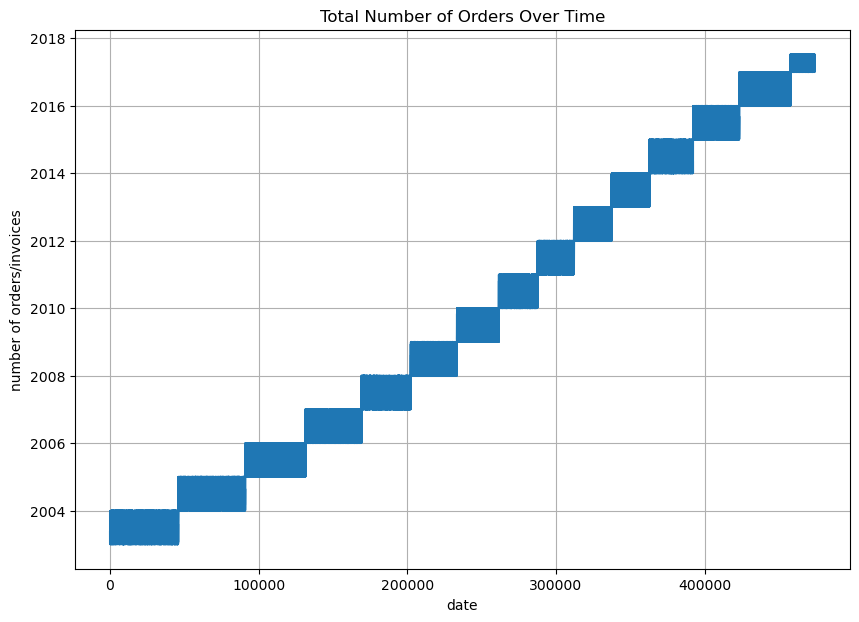